In [2]:
# StewartStack
# Telchurn DA Backup
# 11/04/2023

In [3]:
# import numpy, pandas & seaborn libraries
#set precision of display, 2 decimal places
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
# Set display precision for floating-point numbers to 2 decimal places
pd.set_option('display.precision', 2)
# Set maximum number of columns to display in a DataFrame to 30
pd.set_option('display.max_columns', 30)

In [4]:
# Checking the dataframe has been creates & precision as been set
telchurn = pd.read_csv('TelecomChurn.csv')
telchurn.head()

,state,account length,area code,phone number,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### === Exploring the Dataset ===

In [5]:
# Finds the number of rows and columns (shape)
telchurn.shape

(3333, 21)

In [6]:
# obtain a list of column names (columns)
telchurn.columns

Index(['state', 'account length', 'area code', 'phone number',
       'international plan', 'voice mail plan', 'number vmail messages',
       'total day minutes', 'total day calls', 'total day charge',
       'total eve minutes', 'total eve calls', 'total eve charge',
       'total night minutes', 'total night calls', 'total night charge',
       'total intl minutes', 'total intl calls', 'total intl charge',
       'customer service calls', 'churn'],
      dtype='object')

In [7]:
# Review data types and check for missing values (info())
telchurn.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3333 entries, 0 to 3332
Data columns (total 21 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   state                   3333 non-null   object 
 1   account length          3333 non-null   int64  
 2   area code               3333 non-null   int64  
 3   phone number            3333 non-null   object 
 4   international plan      3333 non-null   object 
 5   voice mail plan         3333 non-null   object 
 6   number vmail messages   3333 non-null   int64  
 7   total day minutes       3333 non-null   float64
 8   total day calls         3333 non-null   int64  
 9   total day charge        3333 non-null   float64
 10  total eve minutes       3333 non-null   float64
 11  total eve calls         3333 non-null   int64  
 12  total eve charge        3333 non-null   float64
 13  total night minutes     3333 non-null   float64
 14  total night calls       3333 non-null   

In [8]:
# Basic statistical information about the data
telchurn.describe()

,account length,area code,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls
count,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00,3333.00
mean,101.06,437.18,8.10,179.78,100.44,30.56,200.98,100.11,17.08,200.87,100.11,9.04,10.24,4.48,2.76,1.56
std,39.82,42.37,13.69,54.47,20.07,9.26,50.71,19.92,4.31,50.57,19.57,2.28,2.79,2.46,0.75,1.32
min,1.00,408.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,23.20,33.00,1.04,0.00,0.00,0.00,0.00
25%,74.00,408.00,0.00,143.70,87.00,24.43,166.60,87.00,14.16,167.00,87.00,7.52,8.50,3.00,2.30,1.00
50%,101.00,415.00,0.00,179.40,101.00,30.50,201.40,100.00,17.12,201.20,100.00,9.05,10.30,4.00,2.78,1.00
75%,127.00,510.00,20.00,216.40,114.00,36.79,235.30,114.00,20.00,235.30,113.00,10.59,12.10,6.00,3.27,2.00
max,243.00,510.00,51.00,350.80,165.00,59.64,363.70,170.00,30.91,395.00,175.00,17.77,20.00,20.00,5.40,9.00


In [9]:
# count()
# Gives totals number or records
telchurn['state'].count()

3333

In [10]:
# value_counts()
# Gives the number of records for each state. This may be of use in another dataset
telchurn['state'].value_counts()

WV    106
MN     84
NY     83
AL     80
WI     78
OH     78
OR     78
WY     77
VA     77
CT     74
MI     73
ID     73
VT     73
TX     72
UT     72
IN     71
MD     70
KS     70
NC     68
NJ     68
MT     68
CO     66
NV     66
WA     66
RI     65
MA     65
MS     65
AZ     64
FL     63
MO     63
NM     62
ME     62
ND     62
NE     61
OK     61
DE     61
SC     60
SD     60
KY     59
IL     58
NH     56
AR     55
GA     54
DC     54
HI     53
TN     53
AK     52
LA     51
PA     45
IA     44
CA     34
Name: state, dtype: int64

In [11]:
# unique()
# gives an array object with abbreviation for each state. Not useful here
state_count = telchurn['state'].unique()
state_count

array(['KS', 'OH', 'NJ', 'OK', 'AL', 'MA', 'MO', 'LA', 'WV', 'IN', 'RI',
       'IA', 'MT', 'NY', 'ID', 'VT', 'VA', 'TX', 'FL', 'CO', 'AZ', 'SC',
       'NE', 'WY', 'HI', 'IL', 'NH', 'GA', 'AK', 'MD', 'AR', 'WI', 'OR',
       'MI', 'DE', 'UT', 'CA', 'MN', 'SD', 'NC', 'WA', 'NM', 'NV', 'DC',
       'KY', 'ME', 'MS', 'TN', 'PA', 'CT', 'ND'], dtype=object)

In [12]:
# nunique()
# check the discrete number of states. 
telchurn['state'].nunique()

51

In [13]:
# Check num of discrete area codes
telchurn['area code'].nunique()

3

In [14]:
# drop()
# drop area code & phone number
telchurn.drop(columns = ['area code', 'phone number'], axis = 1, inplace = True)
telchurn.head()

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


In [15]:
# Not enough information - Trying to find out if this is days
telchurn['account length'].max()

243

In [16]:
# trying with min()
telchurn['account length'].min()

1

#### === Outliers ===

In [17]:
# Find all records where the account length is equal to 243
telchurn.loc[telchurn['account length'] == 243]

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
817,UT,243,no,no,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False


In [18]:
# Find all records where the account length is equal to 243
telchurn.loc[telchurn['account length'] > 200]

,state,account length,international plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
197,TX,208,no,no,0,326.5,67,55.51,176.3,113,14.99,181.7,102,8.18,10.7,6,2.89,2,True
238,WY,215,no,no,0,83.6,148,14.21,120.9,91,10.28,226.6,110,10.20,10.7,9,2.89,0,False
309,SD,209,no,no,0,227.2,128,38.62,258.4,92,21.96,183.5,74,8.26,8.9,4,2.40,3,False
416,DE,224,yes,no,0,171.5,99,29.16,160.0,103,13.60,212.4,102,9.56,5.0,2,1.35,1,True
817,UT,243,no,no,0,95.5,92,16.24,163.7,63,13.91,264.2,118,11.89,6.6,6,1.78,2,False
928,ME,205,no,yes,24,175.8,139,29.89,155.0,98,13.18,180.7,64,8.13,7.8,5,2.11,2,False
1045,TX,217,no,no,0,176.4,115,29.99,158.8,128,13.50,306.6,107,13.80,9.3,3,2.51,4,False
1093,VA,210,no,no,0,104.6,121,17.78,149.5,71,12.71,255.1,67,11.48,6.5,8,1.76,2,False
1387,CT,212,no,no,0,126.0,96,21.42,144.3,80,12.27,302.8,102,13.63,7.6,3,2.05,1,False
1408,NM,232,no,no,0,165.6,104,28.15,195.9,115,16.65,118.3,77,5.32,11.8,3,3.19,1,False


In [19]:
# Counts the total number of records where the account length is greater than 200
telchurn.loc[telchurn['account length'] > 200]['account length'].count()

26

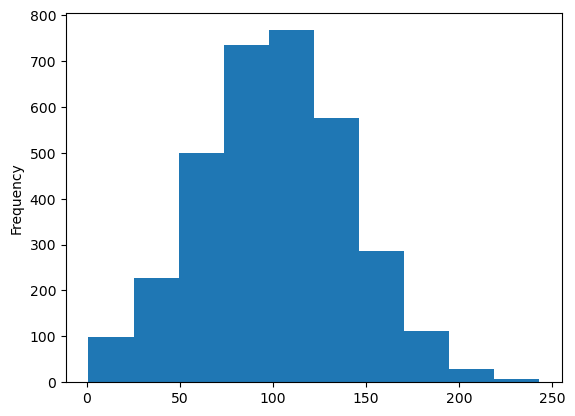

In [20]:
# Distibution using histogram
telchurn['account length'].plot(kind = 'hist');

#### === Change a columns name ===

In [21]:
# Checking column names
telchurn.columns

Index(['state', 'account length', 'international plan', 'voice mail plan',
       'number vmail messages', 'total day minutes', 'total day calls',
       'total day charge', 'total eve minutes', 'total eve calls',
       'total eve charge', 'total night minutes', 'total night calls',
       'total night charge', 'total intl minutes', 'total intl calls',
       'total intl charge', 'customer service calls', 'churn'],
      dtype='object')

In [22]:
# Rename a column
telchurn.rename(columns = {'international plan' : 'intl plan'}, inplace = True)
telchurn.head()

,state,account length,intl plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False


### === CHURN ===

In [23]:
# Here there are 2850 of the 3333 cx that have a value of FALSE in the churn column - Loyal cxs
telchurn['churn'].value_counts()

False    2850
True      483
Name: churn, dtype: int64

In [24]:
# Normalize
# More useful way to display the figures about by changing to a percentage
telchurn['churn'].value_counts(normalize = True)


False    0.86
True     0.14
Name: churn, dtype: float64

In [25]:
# Percentage of churned cx to try get more precision
pc_churn = 483 / 3333
pc_churn

0.14491449144914492

In [26]:
# Percentage of loyal cxs
pc_loyal = 2850 / 3333
pc_loyal

0.8550855085508551

In [27]:
# assigning value counts to variable
churn_counts = (telchurn['churn']).value_counts()
churn_counts

False    2850
True      483
Name: churn, dtype: int64

In [28]:
# More precision using division
print(churn_counts[True] / telchurn['churn'].count())

0.14491449144914492


In [29]:
print(churn_counts[False] / telchurn['churn'].count())

0.8550855085508551


In [30]:
# Mapping and dtype
# Check the dtype of churn series
# May not work without selecting with intellisense
telchurn['churn'].dtype

dtype('bool')

In [31]:
# Change True/False to yes/no in churn column
telchurn['churn'] = telchurn['churn'].map({True: 'yes', False: 'no'})
telchurn.head()

,state,account length,intl plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
0,KS,128,no,yes,25,265.1,110,45.07,197.4,99,16.78,244.7,91,11.01,10.0,3,2.70,1,no
1,OH,107,no,yes,26,161.6,123,27.47,195.5,103,16.62,254.4,103,11.45,13.7,3,3.70,1,no
2,NJ,137,no,no,0,243.4,114,41.38,121.2,110,10.30,162.6,104,7.32,12.2,5,3.29,0,no
3,OH,84,yes,no,0,299.4,71,50.90,61.9,88,5.26,196.9,89,8.86,6.6,7,1.78,2,no
4,OK,75,yes,no,0,166.7,113,28.34,148.3,122,12.61,186.9,121,8.41,10.1,3,2.73,3,no


In [32]:
# The datatype has been changed to O for object
telchurn['churn'].dtype

dtype('O')

#### === Sorting data for comparison ===

In [33]:
# Sort by one column
# Sorting a dataframe by value of one of the variables
# Can sort by total day charge (use ascending = False to sort to descending order) does ascending by default
telchurn.sort_values(by = 'total day charge', ascending = False).head()

,state,account length,intl plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
365,CO,154,no,no,0,350.8,75,59.64,216.5,94,18.40,253.9,100,11.43,10.1,9,2.73,1,yes
985,NY,64,yes,no,0,346.8,55,58.96,249.5,79,21.21,275.4,102,12.39,13.3,9,3.59,1,yes
2594,OH,115,yes,no,0,345.3,81,58.70,203.4,106,17.29,217.5,107,9.79,11.8,8,3.19,1,yes
156,OH,83,no,no,0,337.4,120,57.36,227.4,116,19.33,153.9,114,6.93,15.8,7,4.27,0,yes
605,MO,112,no,no,0,335.5,77,57.04,212.5,109,18.06,265.0,132,11.93,12.7,8,3.43,2,yes


In [34]:
# Sorting with multiple columns
# Maybe a connection between cx calls and churn? Diference meaningful?
telchurn.sort_values(by = ['churn', 'customer service calls'], ascending = [False, False]).head(20)

,state,account length,intl plan,voice mail plan,number vmail messages,total day minutes,total day calls,total day charge,total eve minutes,total eve calls,total eve charge,total night minutes,total night calls,total night charge,total intl minutes,total intl calls,total intl charge,customer service calls,churn
542,MN,152,yes,yes,20,237.5,120,40.38,253.4,94,21.54,265.2,80,11.93,14.2,3,3.83,9,yes
2380,NJ,53,no,no,0,228.6,117,38.86,132.8,123,11.29,227.2,124,10.22,10.1,2,2.73,9,yes
1912,NH,103,no,no,0,150.6,125,25.60,169.1,126,14.37,221.2,104,9.95,10.4,8,2.81,8,yes
332,AL,86,no,no,0,128.3,121,21.81,197.1,93,16.75,138.4,152,6.23,12.2,5,3.29,7,yes
1694,VT,99,no,no,0,115.5,75,19.64,218.1,111,18.54,254.9,98,11.47,11.5,7,3.11,7,yes
1865,MI,146,no,no,0,149.3,83,25.38,187.1,130,15.90,149.8,100,6.74,7.9,4,2.13,7,yes
2979,HI,99,no,no,0,135.7,107,23.07,208.4,103,17.71,209.0,95,9.40,8.8,3,2.38,7,yes
3112,AR,115,no,no,0,139.3,89,23.68,192.3,95,16.35,151.0,75,6.80,9.3,3,2.51,7,yes
721,UT,103,no,yes,36,87.2,92,14.82,169.3,110,14.39,166.7,80,7.50,10.9,5,2.94,6,yes
1142,UT,105,no,no,0,106.4,71,18.09,240.1,83,20.41,147.7,114,6.65,5.3,4,1.43,6,yes


In [35]:
# Doing a comparison with mean on cx calls checking between loyal and churned cxs.
# Average cx calls for churned cx
telchurn[telchurn['churn'] == 'yes']['customer service calls'].mean()

2.229813664596273

In [36]:
# Average cx calls for loyal cxs
telchurn[telchurn['churn'] == 'no']['customer service calls'].mean()

1.4498245614035088

### === Boolean indexing - filtering your data ===

In [37]:
# Booleanindexing with two condition. Churned.
telchurn[(telchurn['churn'] == 'yes') & (telchurn['intl plan'] == 'yes')]['customer service calls'].mean()

1.6058394160583942

In [38]:
# Boolean indexing with two conditions. Loyal
telchurn[(telchurn['churn'] == 'no') & (telchurn['intl plan'] == 'yes')]['customer service calls'].mean()

1.3602150537634408

### === Summerising data ===
#### === Grouping ===

In [39]:
# Grouping using basic stats apart from percentiles
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']
telchurn.groupby(['churn'])[columns_to_show].describe(percentiles = [])

total day minutes                                   total eve minutes  \
                  count    mean    std  min    50%    max             count   
churn                                                                         
no               2850.0  175.18  50.18  0.0  177.2  315.6            2850.0   
yes               483.0  206.91  69.00  0.0  217.6  350.8             483.0   

                                         total night minutes                 \
         mean    std   min    50%    max               count    mean    std   
churn                                                                         
no     199.04  50.29   0.0  199.6  361.8              2850.0  200.13  51.11   
yes    212.41  51.73  70.9  211.3  363.7               483.0  205.23  47.13   

                            
        min     50%    max  
churn                       
no     23.2  200.25  395.0  
yes    47.4  204.80  354.9

In [40]:
#This example is a simple one which shows the max for 3 columns & compares them for loyal & churned customers
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']
telchurn.groupby(['churn'])[columns_to_show].max()

,total day minutes,total eve minutes,total night minutes
churn,,,
no,315.6,361.8,395.0
yes,350.8,363.7,354.9


In [41]:
#Example shows grouping by a different series ('state') using the same totals
columns_to_show = ['total day minutes', 'total eve minutes', 'total night minutes']
telchurn.groupby(['state'])[columns_to_show].max()

,total day minutes,total eve minutes,total night minutes
state,,,
AK,278.4,314.4,303.5
AL,308.0,299.9,287.6
AR,273.4,350.9,367.7
AZ,281.1,328.7,297.9
CA,280.0,281.3,345.8
CO,350.8,341.3,308.2
CT,321.6,335.0,325.6
DC,306.2,337.1,302.0
DE,334.3,328.2,313.2
